# **CA1 of IOT**

1.   Name :- Jeevanjot Kaur
2.   Course :- B.Tech CSE (5th sem)
3.   Regs. No. :- 72111300

---





# **First Image**

---



In [ ]:



import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/uni.jpeg', 0)
cv2_imshow(img)

# Apply Gaussian blur to reduce noise
img_blur = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(img_blur, cmap='gray')
plt.show()

# Calculate gradients using Sobel operator
grad_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)

grad_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)

grad_xy = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)

Hori = np.concatenate((grad_x, grad_y, grad_xy), axis=1)
cv2_imshow(Hori)

# Calculate gradient magnitude and direction
grad_mag = np.sqrt(grad_x**2 + grad_y**2)
plt.imshow(grad_mag, cmap='gray')
plt.show()
grad_orient = np.arctan2(grad_y, grad_x) * (180 / np.pi) % 180
plt.imshow(grad_orient, cmap='gray')
plt.show()

# Perform non-maximum suppression
def non_maximum_suppression(grad_mag, grad_orient):
    rows, cols = grad_mag.shape
    suppressed = np.zeros_like(grad_mag)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = grad_orient[i, j]

            # Determine the neighboring pixels based on the gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                nbr = [grad_mag[i, j+1], grad_mag[i, j-1]]
            elif 22.5 <= angle < 67.5:
                nbr = [grad_mag[i-1, j+1], grad_mag[i+1, j-1]]
            elif 67.5 <= angle < 112.5:
                nbr = [grad_mag[i-1, j], grad_mag[i+1, j]]
            else:
                nbr = [grad_mag[i-1, j-1], grad_mag[i+1, j+1]]

            # Perform non-maximum suppression
            if grad_mag[i, j] >= max(nbr):
                suppressed[i, j] = grad_mag[i, j]

    return suppressed

# Apply non-maximum suppression
suppressed = non_maximum_suppression(grad_mag, grad_orient)


# Define threshold values for edge detection
low_threshold = 50
high_threshold = 150

# Apply double threshold to identify potential edges
edges = np.zeros_like(suppressed)
edges[(suppressed >= low_threshold) & (suppressed <= high_threshold)] = 255

# Perform edge tracking by hysteresis
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

# Display the resulting edges
plt.imshow(edges, cmap='gray')
plt.show()


Output hidden; open in https://colab.research.google.com to view.

# **Variation for first Image**

---



# **First variation by increasing the contrast**

---



In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/uni.jpeg', 0)

# Increase contrast
high_contrast_image = cv2.convertScaleAbs(img, alpha=1.0, beta=50)

# Apply Gaussian blur to reduce noise
img_blur = cv2.GaussianBlur(high_contrast_image, (5, 5), 0)

# Display the result
Hori0 = np.concatenate((img,high_contrast_image,img_blur), axis=1)
cv2_imshow(Hori0)

# Calculate gradients using Sobel operator
grad_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
grad_xy = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)

\










# Calculate gradient magnitude and direction
grad_mag = np.sqrt(grad_x**2 + grad_y**2)
grad_orient = np.arctan2(grad_y, grad_x) * (180 / np.pi) % 180

Hori1 = np.concatenate((img_blur, grad_mag, grad_orient), axis=1)
cv2_imshow(Hori1)

# Perform non-maximum suppression
def non_maximum_suppression(grad_mag, grad_orient):
    rows, cols = grad_mag.shape
    suppressed = np.zeros_like(grad_mag)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = grad_orient[i, j]

            # Determine the neighboring pixels based on the gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                nbr = [grad_mag[i, j+1], grad_mag[i, j-1]]
            elif 22.5 <= angle < 67.5:
                nbr = [grad_mag[i-1, j+1], grad_mag[i+1, j-1]]
            elif 67.5 <= angle < 112.5:
                nbr = [grad_mag[i-1, j], grad_mag[i+1, j]]
            else:
                nbr = [grad_mag[i-1, j-1], grad_mag[i+1, j+1]]

            # Perform non-maximum suppression
            if grad_mag[i, j] >= max(nbr):
                suppressed[i, j] = grad_mag[i, j]

    return suppressed

# Apply non-maximum suppression
suppressed = non_maximum_suppression(grad_mag, grad_orient)

# Define threshold values for edge detection
low_threshold = 50
high_threshold = 150

# Apply double threshold to identify potential edges
edges = np.zeros_like(suppressed)
edges[(suppressed >= low_threshold) & (suppressed <= high_threshold)] = 255

# Perform edge tracking by hysteresis
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

# Display the resulting edges
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()




Output hidden; open in https://colab.research.google.com to view.

# **Second variation by decreasing the contrast**

---



In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/uni.jpeg', 0)

# Decrease contrast
low_contrast_image = cv2.convertScaleAbs(img, alpha=1.0, beta=-50)


# Apply Gaussian blur to reduce noise
img_blur = cv2.GaussianBlur(low_contrast_image, (5, 5), 0)

# Display the result
Hori0 = np.concatenate((img,low_contrast_image,img_blur), axis=1)
cv2_imshow(Hori0)

# Calculate gradients using Sobel operator
grad_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
grad_xy = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)

Hori = np.concatenate((grad_x, grad_y, grad_xy), axis=1)
cv2_imshow(Hori)


# Calculate gradient magnitude and direction
grad_mag = np.sqrt(grad_x**2 + grad_y**2)
grad_orient = np.arctan2(grad_y, grad_x) * (180 / np.pi) % 180

Hori1 = np.concatenate((img_blur, grad_mag, grad_orient), axis=1)
cv2_imshow(Hori1)

# Perform non-maximum suppression
def non_maximum_suppression(grad_mag, grad_orient):
    rows, cols = grad_mag.shape
    suppressed = np.zeros_like(grad_mag)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = grad_orient[i, j]

            # Determine the neighboring pixels based on the gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                nbr = [grad_mag[i, j+1], grad_mag[i, j-1]]
            elif 22.5 <= angle < 67.5:
                nbr = [grad_mag[i-1, j+1], grad_mag[i+1, j-1]]
            elif 67.5 <= angle < 112.5:
                nbr = [grad_mag[i-1, j], grad_mag[i+1, j]]
            else:
                nbr = [grad_mag[i-1, j-1], grad_mag[i+1, j+1]]

            # Perform non-maximum suppression
            if grad_mag[i, j] >= max(nbr):
                suppressed[i, j] = grad_mag[i, j]

    return suppressed

# Apply non-maximum suppression
suppressed = non_maximum_suppression(grad_mag, grad_orient)

# Define threshold values for edge detection
low_threshold = 50
high_threshold = 150

# Apply double threshold to identify potential edges
edges = np.zeros_like(suppressed)
edges[(suppressed >= low_threshold) & (suppressed <= high_threshold)] = 255

# Perform edge tracking by hysteresis
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

# Display the resulting edges
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()


Output hidden; open in https://colab.research.google.com to view.

# **Second Image**

---



In [ ]:


import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/class.jpeg', 0)


# Apply Gaussian blur to reduce noise
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# Display the result
Hori0 = np.concatenate((img,img_blur), axis=1)
cv2_imshow(Hori0)

# Calculate gradients using Sobel operator
grad_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
grad_xy = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)

Hori = np.concatenate((grad_x, grad_y, grad_xy), axis=1)
cv2_imshow(Hori)


# Calculate gradient magnitude and direction
grad_mag = np.sqrt(grad_x**2 + grad_y**2)
grad_orient = np.arctan2(grad_y, grad_x) * (180 / np.pi) % 180

Hori1 = np.concatenate((img_blur, grad_mag, grad_orient), axis=1)
cv2_imshow(Hori1)

# Perform non-maximum suppression
def non_maximum_suppression(grad_mag, grad_orient):
    rows, cols = grad_mag.shape
    suppressed = np.zeros_like(grad_mag)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = grad_orient[i, j]

            # Determine the neighboring pixels based on the gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                nbr = [grad_mag[i, j+1], grad_mag[i, j-1]]
            elif 22.5 <= angle < 67.5:
                nbr = [grad_mag[i-1, j+1], grad_mag[i+1, j-1]]
            elif 67.5 <= angle < 112.5:
                nbr = [grad_mag[i-1, j], grad_mag[i+1, j]]
            else:
                nbr = [grad_mag[i-1, j-1], grad_mag[i+1, j+1]]

            # Perform non-maximum suppression
            if grad_mag[i, j] >= max(nbr):
                suppressed[i, j] = grad_mag[i, j]

    return suppressed


# Apply non-maximum suppression
suppressed = non_maximum_suppression(grad_mag, grad_orient)

# Define threshold values for edge detection
low_threshold = 50
high_threshold = 150

# Apply double threshold to identify potential edges
edges = np.zeros_like(suppressed)
edges[(suppressed >= low_threshold) & (suppressed <= high_threshold)] = 255

# Perform edge tracking by hysteresis
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

# Display the resulting edges
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

# **Variations of Second Image**

---



# **Variation by Increasing Brightness**

---



In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/class.jpeg', 0)

# Increase brightness
bright_image = cv2.convertScaleAbs(img, alpha=1.5, beta=0)

# Apply Gaussian blur to reduce noise
img_blur = cv2.GaussianBlur(bright_image, (5, 5), 0)

# Display the result
Hori0 = np.concatenate((img,bright_image,img_blur), axis=1)
cv2_imshow(Hori0)

# Calculate gradients using Sobel operator
grad_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
grad_xy = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)

Hori = np.concatenate((grad_x, grad_y, grad_xy), axis=1)
cv2_imshow(Hori)


# Calculate gradient magnitude and direction
grad_mag = np.sqrt(grad_x**2 + grad_y**2)
grad_orient = np.arctan2(grad_y, grad_x) * (180 / np.pi) % 180

Hori1 = np.concatenate((img_blur, grad_mag, grad_orient), axis=1)
cv2_imshow(Hori1)

# Perform non-maximum suppression
def non_maximum_suppression(grad_mag, grad_orient):
    rows, cols = grad_mag.shape
    suppressed = np.zeros_like(grad_mag)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = grad_orient[i, j]

            # Determine the neighboring pixels based on the gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                nbr = [grad_mag[i, j+1], grad_mag[i, j-1]]
            elif 22.5 <= angle < 67.5:
                nbr = [grad_mag[i-1, j+1], grad_mag[i+1, j-1]]
            elif 67.5 <= angle < 112.5:
                nbr = [grad_mag[i-1, j], grad_mag[i+1, j]]
            else:
                nbr = [grad_mag[i-1, j-1], grad_mag[i+1, j+1]]

            # Perform non-maximum suppression
            if grad_mag[i, j] >= max(nbr):
                suppressed[i, j] = grad_mag[i, j]

    return suppressed


# Apply non-maximum suppression
suppressed = non_maximum_suppression(grad_mag, grad_orient)

# Define threshold values for edge detection
low_threshold = 50
high_threshold = 150

# Apply double threshold to identify potential edges
edges = np.zeros_like(suppressed)
edges[(suppressed >= low_threshold) & (suppressed <= high_threshold)] = 255

# Perform edge tracking by hysteresis
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

# Display the resulting edges
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

# **Variation by Decreasing Brightness**

---



In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/class.jpeg', 0)

# Decrease brightness
dark_image = cv2.convertScaleAbs(img, alpha=0.5, beta=0)

# Apply Gaussian blur to reduce noise
img_blur = cv2.GaussianBlur(dark_image, (5, 5), 0)

# Display the result
Hori0 = np.concatenate((img, dark_image, img_blur), axis=1)
cv2_imshow(Hori0)

# Calculate gradients using Sobel operator
grad_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
grad_xy = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)

Hori = np.concatenate((grad_x, grad_y, grad_xy), axis=1)
cv2_imshow(Hori)


# Calculate gradient magnitude and direction
grad_mag = np.sqrt(grad_x**2 + grad_y**2)
grad_orient = np.arctan2(grad_y, grad_x) * (180 / np.pi) % 180

Hori1 = np.concatenate((img_blur, grad_mag, grad_orient), axis=1)
cv2_imshow(Hori1)

# Perform non-maximum suppression
def non_maximum_suppression(grad_mag, grad_orient):
    rows, cols = grad_mag.shape
    suppressed = np.zeros_like(grad_mag)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = grad_orient[i, j]

            # Determine the neighboring pixels based on the gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                nbr = [grad_mag[i, j+1], grad_mag[i, j-1]]
            elif 22.5 <= angle < 67.5:
                nbr = [grad_mag[i-1, j+1], grad_mag[i+1, j-1]]
            elif 67.5 <= angle < 112.5:
                nbr = [grad_mag[i-1, j], grad_mag[i+1, j]]
            else:
                nbr = [grad_mag[i-1, j-1], grad_mag[i+1, j+1]]

            # Perform non-maximum suppression
            if grad_mag[i, j] >= max(nbr):
                suppressed[i, j] = grad_mag[i, j]

    return suppressed


# Apply non-maximum suppression
suppressed = non_maximum_suppression(grad_mag, grad_orient)

# Define threshold values for edge detection
low_threshold = 50
high_threshold = 150

# Apply double threshold to identify potential edges
edges = np.zeros_like(suppressed)
edges[(suppressed >= low_threshold) & (suppressed <= high_threshold)] = 255

# Perform edge tracking by hysteresis
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

# Display the resulting edges
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

# **Third Image**

---



In [ ]:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/building.jpeg', 0)


# Apply Gaussian blur to reduce noise
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# Display the result
Hori0 = np.concatenate((img,img_blur), axis=1)
cv2_imshow(Hori0)

# Calculate gradients using Sobel operator
grad_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
grad_xy = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)

Hori = np.concatenate((grad_x, grad_y, grad_xy), axis=1)
cv2_imshow(Hori)


# Calculate gradient magnitude and direction
grad_mag = np.sqrt(grad_x**2 + grad_y**2)
grad_orient = np.arctan2(grad_y, grad_x) * (180 / np.pi) % 180

Hori1 = np.concatenate((img_blur, grad_mag, grad_orient), axis=1)
cv2_imshow(Hori1)

# Perform non-maximum suppression
def non_maximum_suppression(grad_mag, grad_orient):
    rows, cols = grad_mag.shape
    suppressed = np.zeros_like(grad_mag)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = grad_orient[i, j]

            # Determine the neighboring pixels based on the gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                nbr = [grad_mag[i, j+1], grad_mag[i, j-1]]
            elif 22.5 <= angle < 67.5:
                nbr = [grad_mag[i-1, j+1], grad_mag[i+1, j-1]]
            elif 67.5 <= angle < 112.5:
                nbr = [grad_mag[i-1, j], grad_mag[i+1, j]]
            else:
                nbr = [grad_mag[i-1, j-1], grad_mag[i+1, j+1]]

            # Perform non-maximum suppression
            if grad_mag[i, j] >= max(nbr):
                suppressed[i, j] = grad_mag[i, j]

    return suppressed


# Apply non-maximum suppression
suppressed = non_maximum_suppression(grad_mag, grad_orient)

# Define threshold values for edge detection
low_threshold = 50
high_threshold = 150

# Apply double threshold to identify potential edges
edges = np.zeros_like(suppressed)
edges[(suppressed >= low_threshold) & (suppressed <= high_threshold)] = 255

# Perform edge tracking by hysteresis
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

# Display the resulting edges
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

# **Variations of Third Image**

---



# **Variation by Rotating Clockwise**

---



In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/building.jpeg', 0)
cv2_imshow(img)

# Rotate the image by 90 degrees
rotated_image = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

# Apply Gaussian blur to reduce noise
img_blur = cv2.GaussianBlur(rotated_image, (5, 5), 0)

# Display the result
Hori0 = np.concatenate((rotated_image, img_blur), axis=1)
cv2_imshow(Hori0)

# Calculate gradients using Sobel operator
grad_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
grad_xy = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)

Hori = np.concatenate((grad_x, grad_y, grad_xy), axis=1)
cv2_imshow(Hori)


# Calculate gradient magnitude and direction
grad_mag = np.sqrt(grad_x**2 + grad_y**2)
grad_orient = np.arctan2(grad_y, grad_x) * (180 / np.pi) % 180

Hori1 = np.concatenate((img_blur, grad_mag, grad_orient), axis=1)
cv2_imshow(Hori1)

# Perform non-maximum suppression
def non_maximum_suppression(grad_mag, grad_orient):
    rows, cols = grad_mag.shape
    suppressed = np.zeros_like(grad_mag)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = grad_orient[i, j]

            # Determine the neighboring pixels based on the gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                nbr = [grad_mag[i, j+1], grad_mag[i, j-1]]
            elif 22.5 <= angle < 67.5:
                nbr = [grad_mag[i-1, j+1], grad_mag[i+1, j-1]]
            elif 67.5 <= angle < 112.5:
                nbr = [grad_mag[i-1, j], grad_mag[i+1, j]]
            else:
                nbr = [grad_mag[i-1, j-1], grad_mag[i+1, j+1]]

            # Perform non-maximum suppression
            if grad_mag[i, j] >= max(nbr):
                suppressed[i, j] = grad_mag[i, j]

    return suppressed


# Apply non-maximum suppression
suppressed = non_maximum_suppression(grad_mag, grad_orient)

# Define threshold values for edge detection
low_threshold = 50
high_threshold = 150

# Apply double threshold to identify potential edges
edges = np.zeros_like(suppressed)
edges[(suppressed >= low_threshold) & (suppressed <= high_threshold)] = 255

# Perform edge tracking by hysteresis
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

# Display the resulting edges
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

# **Variation by increasing brightness and decreasing contrast**

---



In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/building.jpeg', 0)

# Increase brightness
bright_image = cv2.convertScaleAbs(img, alpha=1.5, beta=0)

# Decrease contrast
low_contrast_image = cv2.convertScaleAbs(bright_image, alpha=1.0, beta=-50)

#Apply gaussian blur to reducw noise
img_blur = cv2.GaussianBlur(low_contrast_image, (5, 5), 0)

# Display the result
Hori0 = np.concatenate((img, low_contrast_image, img_blur), axis=1)
cv2_imshow(Hori0)

# Calculate gradients using Sobel operator
grad_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
grad_xy = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)

Hori = np.concatenate((grad_x, grad_y, grad_xy), axis=1)
cv2_imshow(Hori)


# Calculate gradient magnitude and direction
grad_mag = np.sqrt(grad_x**2 + grad_y**2)
grad_orient = np.arctan2(grad_y, grad_x) * (180 / np.pi) % 180

Hori1 = np.concatenate((img_blur, grad_mag, grad_orient), axis=1)
cv2_imshow(Hori1)

# Perform non-maximum suppression
def non_maximum_suppression(grad_mag, grad_orient):
    rows, cols = grad_mag.shape
    suppressed = np.zeros_like(grad_mag)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = grad_orient[i, j]

            # Determine the neighboring pixels based on the gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                nbr = [grad_mag[i, j+1], grad_mag[i, j-1]]
            elif 22.5 <= angle < 67.5:
                nbr = [grad_mag[i-1, j+1], grad_mag[i+1, j-1]]
            elif 67.5 <= angle < 112.5:
                nbr = [grad_mag[i-1, j], grad_mag[i+1, j]]
            else:
                nbr = [grad_mag[i-1, j-1], grad_mag[i+1, j+1]]

            # Perform non-maximum suppression
            if grad_mag[i, j] >= max(nbr):
                suppressed[i, j] = grad_mag[i, j]

    return suppressed


# Apply non-maximum suppression
suppressed = non_maximum_suppression(grad_mag, grad_orient)

# Define threshold values for edge detection
low_threshold = 50
high_threshold = 150

# Apply double threshold to identify potential edges
edges = np.zeros_like(suppressed)
edges[(suppressed >= low_threshold) & (suppressed <= high_threshold)] = 255

# Perform edge tracking by hysteresis
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

# Display the resulting edges
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

# **Fourth Image**

---



In [ ]:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/stairs.jpeg', 0)


# Apply Gaussian blur to reduce noise
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# Display the result
Hori0 = np.concatenate((img,img_blur), axis=1)
cv2_imshow(Hori0)

# Calculate gradients using Sobel operator
grad_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
grad_xy = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)

Hori = np.concatenate((grad_x, grad_y, grad_xy), axis=1)
cv2_imshow(Hori)


# Calculate gradient magnitude and direction
grad_mag = np.sqrt(grad_x**2 + grad_y**2)
grad_orient = np.arctan2(grad_y, grad_x) * (180 / np.pi) % 180

Hori1 = np.concatenate((img_blur, grad_mag, grad_orient), axis=1)
cv2_imshow(Hori1)

# Perform non-maximum suppression
def non_maximum_suppression(grad_mag, grad_orient):
    rows, cols = grad_mag.shape
    suppressed = np.zeros_like(grad_mag)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = grad_orient[i, j]

            # Determine the neighboring pixels based on the gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                nbr = [grad_mag[i, j+1], grad_mag[i, j-1]]
            elif 22.5 <= angle < 67.5:
                nbr = [grad_mag[i-1, j+1], grad_mag[i+1, j-1]]
            elif 67.5 <= angle < 112.5:
                nbr = [grad_mag[i-1, j], grad_mag[i+1, j]]
            else:
                nbr = [grad_mag[i-1, j-1], grad_mag[i+1, j+1]]

            # Perform non-maximum suppression
            if grad_mag[i, j] >= max(nbr):
                suppressed[i, j] = grad_mag[i, j]

    return suppressed


# Apply non-maximum suppression
suppressed = non_maximum_suppression(grad_mag, grad_orient)

# Define threshold values for edge detection
low_threshold = 50
high_threshold = 150

# Apply double threshold to identify potential edges
edges = np.zeros_like(suppressed)
edges[(suppressed >= low_threshold) & (suppressed <= high_threshold)] = 255

# Perform edge tracking by hysteresis
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

# Display the resulting edges
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

# **Variation for fourth image**



---





# **Variation by decreasing brightness and decreasing contrast**

In [ ]:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/stairs.jpeg', 0)

# Decrease brightness
dark_image = cv2.convertScaleAbs(img, alpha=0.5, beta=0)

# Decrease contrast
low_contrast_image = cv2.convertScaleAbs(dark_image, alpha=1.0, beta=-50)

# Apply Gaussian blur to reduce noise
img_blur = cv2.GaussianBlur(low_contrast_image, (5, 5), 0)

# Display the result
Hori0 = np.concatenate((img,low_contrast_image,img_blur), axis=1)
cv2_imshow(Hori0)

# Calculate gradients using Sobel operator
grad_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
grad_xy = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)

Hori = np.concatenate((grad_x, grad_y, grad_xy), axis=1)
cv2_imshow(Hori)


# Calculate gradient magnitude and direction
grad_mag = np.sqrt(grad_x**2 + grad_y**2)
grad_orient = np.arctan2(grad_y, grad_x) * (180 / np.pi) % 180

Hori1 = np.concatenate((img_blur, grad_mag, grad_orient), axis=1)
cv2_imshow(Hori1)

# Perform non-maximum suppression
def non_maximum_suppression(grad_mag, grad_orient):
    rows, cols = grad_mag.shape
    suppressed = np.zeros_like(grad_mag)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = grad_orient[i, j]

            # Determine the neighboring pixels based on the gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                nbr = [grad_mag[i, j+1], grad_mag[i, j-1]]
            elif 22.5 <= angle < 67.5:
                nbr = [grad_mag[i-1, j+1], grad_mag[i+1, j-1]]
            elif 67.5 <= angle < 112.5:
                nbr = [grad_mag[i-1, j], grad_mag[i+1, j]]
            else:
                nbr = [grad_mag[i-1, j-1], grad_mag[i+1, j+1]]

            # Perform non-maximum suppression
            if grad_mag[i, j] >= max(nbr):
                suppressed[i, j] = grad_mag[i, j]

    return suppressed


# Apply non-maximum suppression
suppressed = non_maximum_suppression(grad_mag, grad_orient)

# Define threshold values for edge detection
low_threshold = 50
high_threshold = 150

# Apply double threshold to identify potential edges
edges = np.zeros_like(suppressed)
edges[(suppressed >= low_threshold) & (suppressed <= high_threshold)] = 255

# Perform edge tracking by hysteresis
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

# Display the resulting edges
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

# **Variation by increasing brightness and increasing contrast**

---



In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/stairs.jpeg', 0)

# Increase brightness
bright_image = cv2.convertScaleAbs(img, alpha=1.5, beta=0)

# Increase contrast
high_contrast_image = cv2.convertScaleAbs(bright_image, alpha=1.0, beta=50)

# Apply Gaussian blur to reduce noise
img_blur = cv2.GaussianBlur(high_contrast_image, (5, 5), 0)

# Display the result
Hori0 = np.concatenate((img,high_contrast_image,img_blur), axis=1)
cv2_imshow(Hori0)

# Calculate gradients using Sobel operator
grad_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
grad_xy = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)

Hori = np.concatenate((grad_x, grad_y, grad_xy), axis=1)
cv2_imshow(Hori)


# Calculate gradient magnitude and direction
grad_mag = np.sqrt(grad_x**2 + grad_y**2)
grad_orient = np.arctan2(grad_y, grad_x) * (180 / np.pi) % 180

Hori1 = np.concatenate((img_blur, grad_mag, grad_orient), axis=1)
cv2_imshow(Hori1)

# Perform non-maximum suppression
def non_maximum_suppression(grad_mag, grad_orient):
    rows, cols = grad_mag.shape
    suppressed = np.zeros_like(grad_mag)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = grad_orient[i, j]

            # Determine the neighboring pixels based on the gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                nbr = [grad_mag[i, j+1], grad_mag[i, j-1]]
            elif 22.5 <= angle < 67.5:
                nbr = [grad_mag[i-1, j+1], grad_mag[i+1, j-1]]
            elif 67.5 <= angle < 112.5:
                nbr = [grad_mag[i-1, j], grad_mag[i+1, j]]
            else:
                nbr = [grad_mag[i-1, j-1], grad_mag[i+1, j+1]]

            # Perform non-maximum suppression
            if grad_mag[i, j] >= max(nbr):
                suppressed[i, j] = grad_mag[i, j]

    return suppressed


# Apply non-maximum suppression
suppressed = non_maximum_suppression(grad_mag, grad_orient)

# Define threshold values for edge detection
low_threshold = 50
high_threshold = 150

# Apply double threshold to identify potential edges
edges = np.zeros_like(suppressed)
edges[(suppressed >= low_threshold) & (suppressed <= high_threshold)] = 255

# Perform edge tracking by hysteresis
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

# Display the resulting edges
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

# **Fifth Image**

---



In [ ]:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/ct.jpeg', 0)


# Apply Gaussian blur to reduce noise
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# Display the result
Hori0 = np.concatenate((img,img_blur), axis=1)
cv2_imshow(Hori0)

# Calculate gradients using Sobel operator
grad_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
grad_xy = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)

Hori = np.concatenate((grad_x, grad_y, grad_xy), axis=1)
cv2_imshow(Hori)


# Calculate gradient magnitude and direction
grad_mag = np.sqrt(grad_x**2 + grad_y**2)
grad_orient = np.arctan2(grad_y, grad_x) * (180 / np.pi) % 180

Hori1 = np.concatenate((img_blur, grad_mag, grad_orient), axis=1)
cv2_imshow(Hori1)

# Perform non-maximum suppression
def non_maximum_suppression(grad_mag, grad_orient):
    rows, cols = grad_mag.shape
    suppressed = np.zeros_like(grad_mag)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = grad_orient[i, j]

            # Determine the neighboring pixels based on the gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                nbr = [grad_mag[i, j+1], grad_mag[i, j-1]]
            elif 22.5 <= angle < 67.5:
                nbr = [grad_mag[i-1, j+1], grad_mag[i+1, j-1]]
            elif 67.5 <= angle < 112.5:
                nbr = [grad_mag[i-1, j], grad_mag[i+1, j]]
            else:
                nbr = [grad_mag[i-1, j-1], grad_mag[i+1, j+1]]

            # Perform non-maximum suppression
            if grad_mag[i, j] >= max(nbr):
                suppressed[i, j] = grad_mag[i, j]

    return suppressed


# Apply non-maximum suppression
suppressed = non_maximum_suppression(grad_mag, grad_orient)

# Define threshold values for edge detection
low_threshold = 50
high_threshold = 150

# Apply double threshold to identify potential edges
edges = np.zeros_like(suppressed)
edges[(suppressed >= low_threshold) & (suppressed <= high_threshold)] = 255

# Perform edge tracking by hysteresis
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

# Display the resulting edges
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()


Output hidden; open in https://colab.research.google.com to view.

# **Variations of fifth image**

---



# **Variation by resizing the image**

---



In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/ct.jpeg', 0)
cv2_imshow(img)

# Resize the image
image = cv2.resize(img, (800, 800))

# Apply Gaussian blur to reduce noise
img_blur = cv2.GaussianBlur(image, (5, 5), 0)

# Display the result
Hori0 = np.concatenate((image,img_blur), axis=1)
cv2_imshow(Hori0)

# Calculate gradients using Sobel operator
grad_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
grad_xy = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)

Hori = np.concatenate((grad_x, grad_y, grad_xy), axis=1)
cv2_imshow(Hori)


# Calculate gradient magnitude and direction
grad_mag = np.sqrt(grad_x**2 + grad_y**2)
grad_orient = np.arctan2(grad_y, grad_x) * (180 / np.pi) % 180

Hori1 = np.concatenate((img_blur, grad_mag, grad_orient), axis=1)
cv2_imshow(Hori1)

# Perform non-maximum suppression
def non_maximum_suppression(grad_mag, grad_orient):
    rows, cols = grad_mag.shape
    suppressed = np.zeros_like(grad_mag)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = grad_orient[i, j]

            # Determine the neighboring pixels based on the gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                nbr = [grad_mag[i, j+1], grad_mag[i, j-1]]
            elif 22.5 <= angle < 67.5:
                nbr = [grad_mag[i-1, j+1], grad_mag[i+1, j-1]]
            elif 67.5 <= angle < 112.5:
                nbr = [grad_mag[i-1, j], grad_mag[i+1, j]]
            else:
                nbr = [grad_mag[i-1, j-1], grad_mag[i+1, j+1]]

            # Perform non-maximum suppression
            if grad_mag[i, j] >= max(nbr):
                suppressed[i, j] = grad_mag[i, j]

    return suppressed


# Apply non-maximum suppression
suppressed = non_maximum_suppression(grad_mag, grad_orient)

# Define threshold values for edge detection
low_threshold = 50
high_threshold = 150

# Apply double threshold to identify potential edges
edges = np.zeros_like(suppressed)
edges[(suppressed >= low_threshold) & (suppressed <= high_threshold)] = 255

# Perform edge tracking by hysteresis
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

# Display the resulting edges
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

# **Variation by decreasing brightness and increasing contrast**

---



In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/ct.jpeg', 0)

# Decrease brightness
dark_image = cv2.convertScaleAbs(img, alpha=0.5, beta=0)

# Increase contrast
high_contrast_image = cv2.convertScaleAbs(dark_image, alpha=1.0, beta=50)

# Apply Gaussian blur to reduce noise
img_blur = cv2.GaussianBlur(high_contrast_image, (5, 5), 0)

# Display the result
Hori0 = np.concatenate((img,high_contrast_image,img_blur), axis=1)
cv2_imshow(Hori0)

# Calculate gradients using Sobel operator
grad_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
grad_xy = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)

Hori = np.concatenate((grad_x, grad_y, grad_xy), axis=1)
cv2_imshow(Hori)


# Calculate gradient magnitude and direction
grad_mag = np.sqrt(grad_x**2 + grad_y**2)
grad_orient = np.arctan2(grad_y, grad_x) * (180 / np.pi) % 180

Hori1 = np.concatenate((img_blur, grad_mag, grad_orient), axis=1)
cv2_imshow(Hori1)

# Perform non-maximum suppression
def non_maximum_suppression(grad_mag, grad_orient):
    rows, cols = grad_mag.shape
    suppressed = np.zeros_like(grad_mag)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = grad_orient[i, j]

            # Determine the neighboring pixels based on the gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                nbr = [grad_mag[i, j+1], grad_mag[i, j-1]]
            elif 22.5 <= angle < 67.5:
                nbr = [grad_mag[i-1, j+1], grad_mag[i+1, j-1]]
            elif 67.5 <= angle < 112.5:
                nbr = [grad_mag[i-1, j], grad_mag[i+1, j]]
            else:
                nbr = [grad_mag[i-1, j-1], grad_mag[i+1, j+1]]

            # Perform non-maximum suppression
            if grad_mag[i, j] >= max(nbr):
                suppressed[i, j] = grad_mag[i, j]

    return suppressed


# Apply non-maximum suppression
suppressed = non_maximum_suppression(grad_mag, grad_orient)

# Define threshold values for edge detection
low_threshold = 50
high_threshold = 150

# Apply double threshold to identify potential edges
edges = np.zeros_like(suppressed)
edges[(suppressed >= low_threshold) & (suppressed <= high_threshold)] = 255

# Perform edge tracking by hysteresis
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

# Display the resulting edges
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()


Output hidden; open in https://colab.research.google.com to view.

# **Sixth Image**

---



In [ ]:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/parking.jpeg', 0)


# Apply Gaussian blur to reduce noise
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# Display the result
Hori0 = np.concatenate((img,img_blur), axis=1)
cv2_imshow(Hori0)

# Calculate gradients using Sobel operator
grad_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
grad_xy = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)

Hori = np.concatenate((grad_x, grad_y, grad_xy), axis=1)
cv2_imshow(Hori)


# Calculate gradient magnitude and direction
grad_mag = np.sqrt(grad_x**2 + grad_y**2)
grad_orient = np.arctan2(grad_y, grad_x) * (180 / np.pi) % 180

Hori1 = np.concatenate((img_blur, grad_mag, grad_orient), axis=1)
cv2_imshow(Hori1)

# Perform non-maximum suppression
def non_maximum_suppression(grad_mag, grad_orient):
    rows, cols = grad_mag.shape
    suppressed = np.zeros_like(grad_mag)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = grad_orient[i, j]

            # Determine the neighboring pixels based on the gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                nbr = [grad_mag[i, j+1], grad_mag[i, j-1]]
            elif 22.5 <= angle < 67.5:
                nbr = [grad_mag[i-1, j+1], grad_mag[i+1, j-1]]
            elif 67.5 <= angle < 112.5:
                nbr = [grad_mag[i-1, j], grad_mag[i+1, j]]
            else:
                nbr = [grad_mag[i-1, j-1], grad_mag[i+1, j+1]]

            # Perform non-maximum suppression
            if grad_mag[i, j] >= max(nbr):
                suppressed[i, j] = grad_mag[i, j]

    return suppressed


# Apply non-maximum suppression
suppressed = non_maximum_suppression(grad_mag, grad_orient)

# Define threshold values for edge detection
low_threshold = 50
high_threshold = 150

# Apply double threshold to identify potential edges
edges = np.zeros_like(suppressed)
edges[(suppressed >= low_threshold) & (suppressed <= high_threshold)] = 255

# Perform edge tracking by hysteresis
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

# Display the resulting edges
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

# **Variations of sixth image**

---



# **Variation by resizing**

---



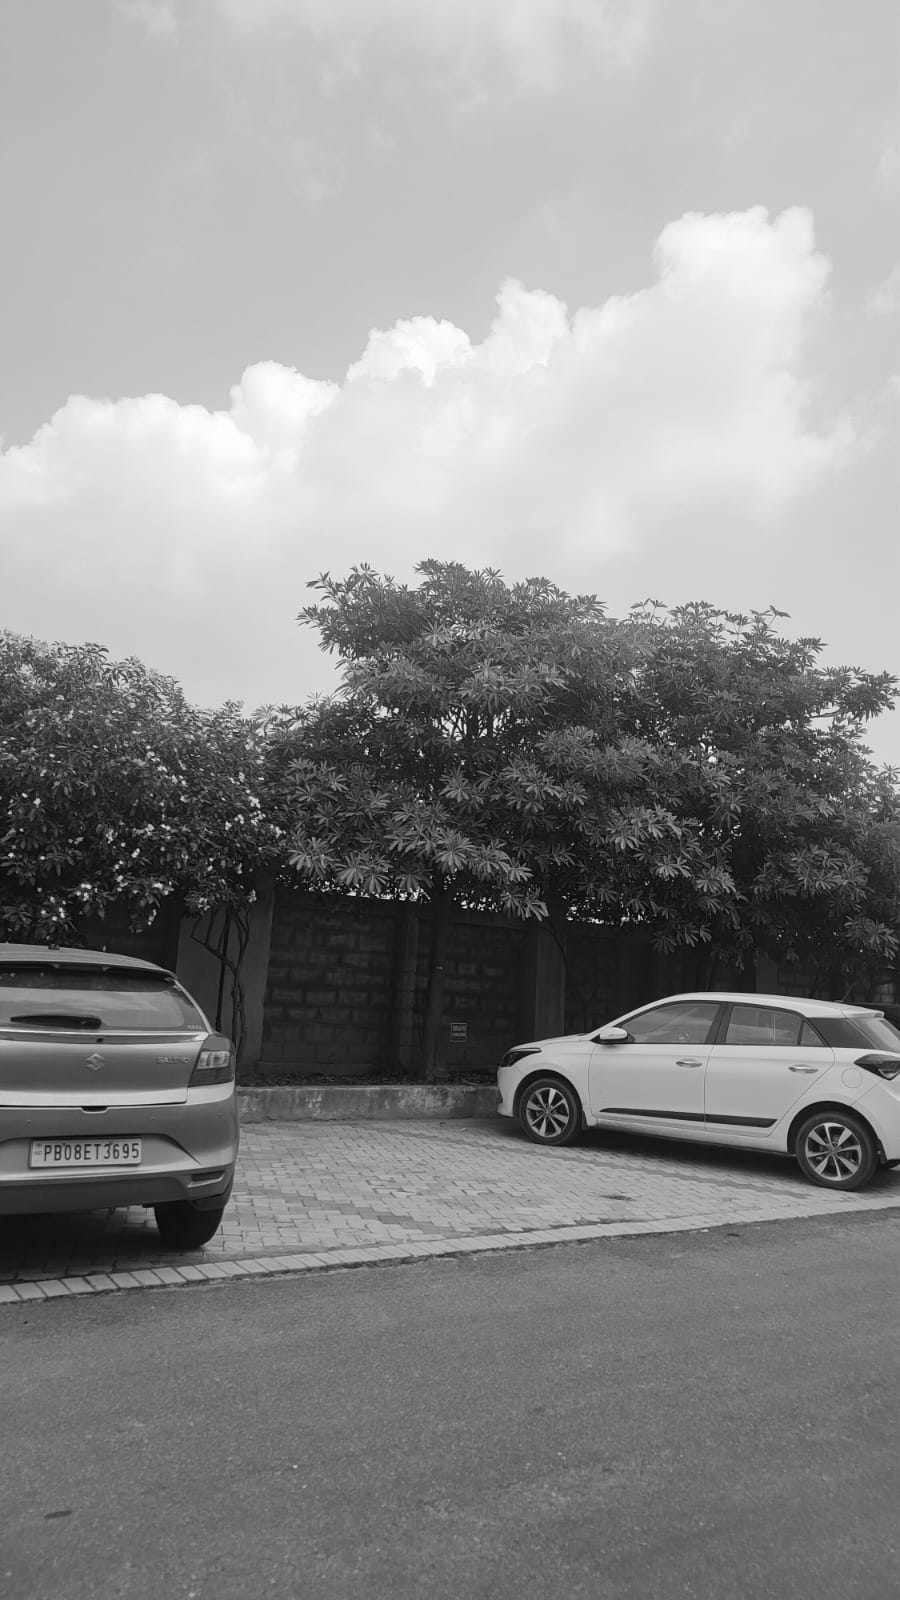

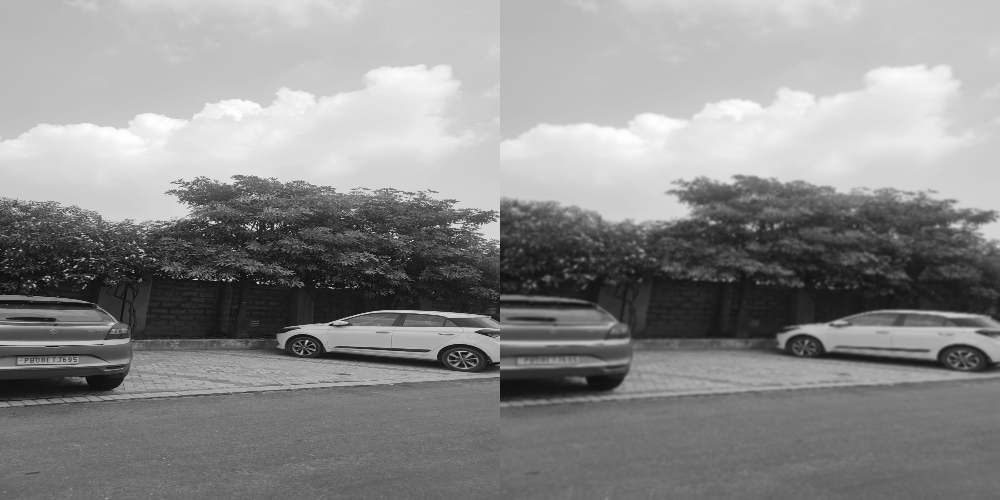

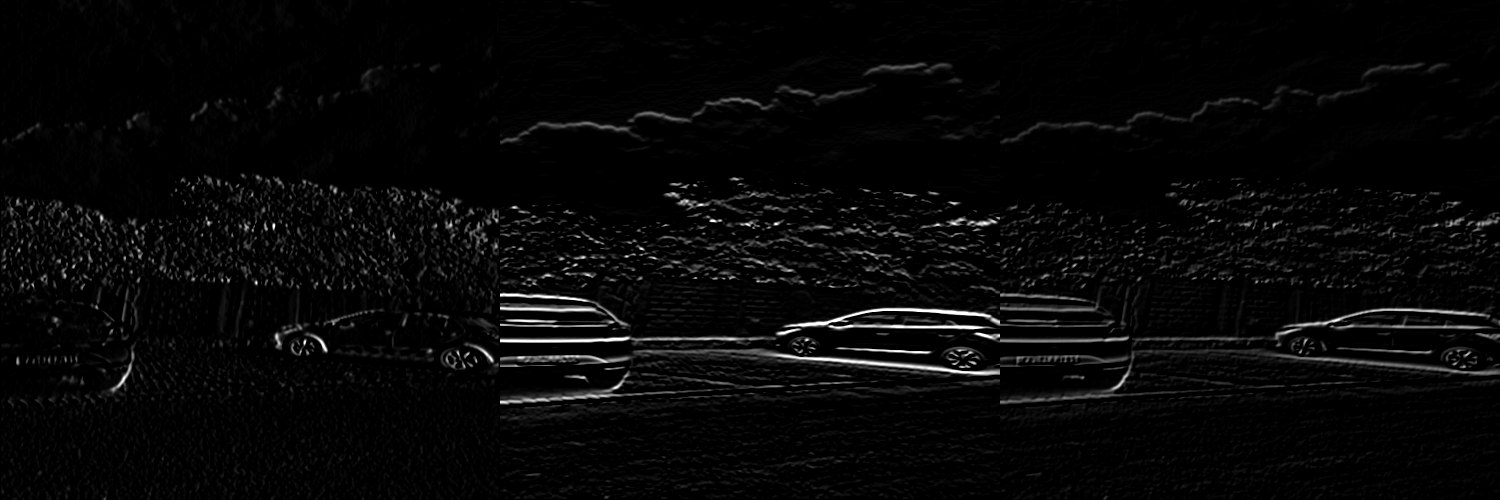

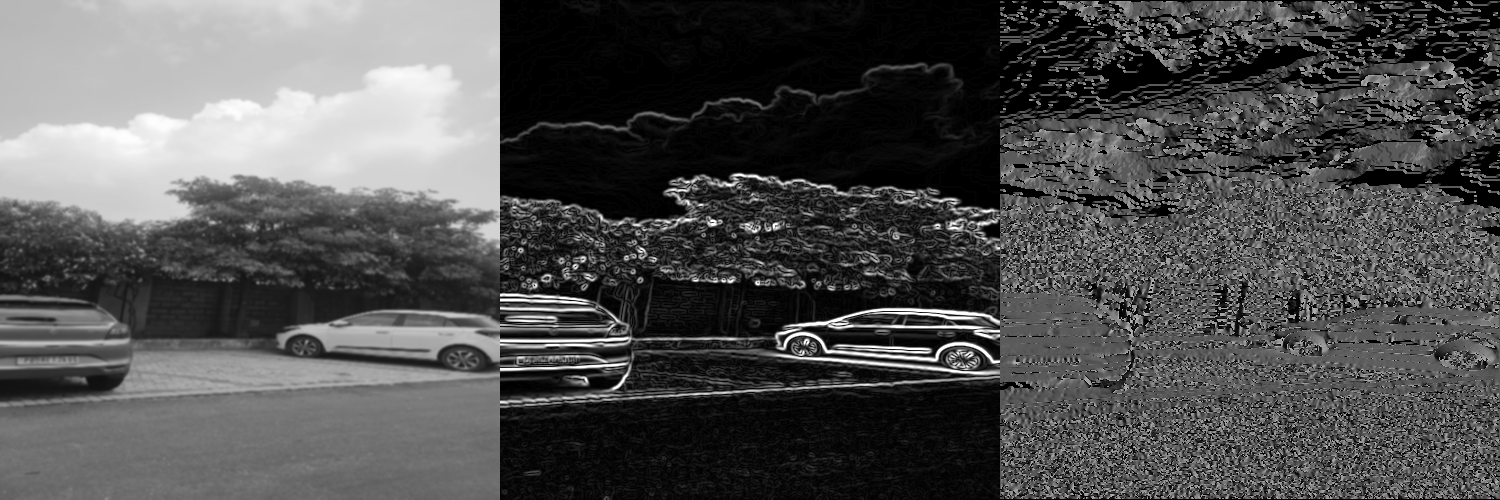

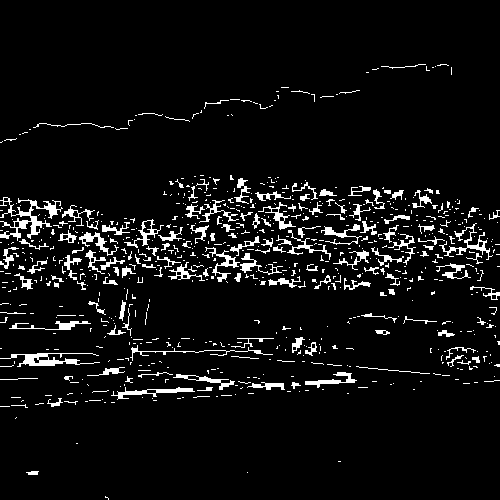

In [ ]:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/parking.jpeg', 0)
cv2_imshow(img)

# Resize the image
image = cv2.resize(img, (500, 500))

# Apply Gaussian blur to reduce noise
img_blur = cv2.GaussianBlur(image, (5, 5), 0)

# Display the result
Hori0 = np.concatenate((image,img_blur), axis=1)
cv2_imshow(Hori0)

# Calculate gradients using Sobel operator
grad_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
grad_xy = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)

Hori = np.concatenate((grad_x, grad_y, grad_xy), axis=1)
cv2_imshow(Hori)


# Calculate gradient magnitude and direction
grad_mag = np.sqrt(grad_x**2 + grad_y**2)
grad_orient = np.arctan2(grad_y, grad_x) * (180 / np.pi) % 180

Hori1 = np.concatenate((img_blur, grad_mag, grad_orient), axis=1)
cv2_imshow(Hori1)

# Perform non-maximum suppression
def non_maximum_suppression(grad_mag, grad_orient):
    rows, cols = grad_mag.shape
    suppressed = np.zeros_like(grad_mag)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = grad_orient[i, j]

            # Determine the neighboring pixels based on the gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                nbr = [grad_mag[i, j+1], grad_mag[i, j-1]]
            elif 22.5 <= angle < 67.5:
                nbr = [grad_mag[i-1, j+1], grad_mag[i+1, j-1]]
            elif 67.5 <= angle < 112.5:
                nbr = [grad_mag[i-1, j], grad_mag[i+1, j]]
            else:
                nbr = [grad_mag[i-1, j-1], grad_mag[i+1, j+1]]

            # Perform non-maximum suppression
            if grad_mag[i, j] >= max(nbr):
                suppressed[i, j] = grad_mag[i, j]

    return suppressed


# Apply non-maximum suppression
suppressed = non_maximum_suppression(grad_mag, grad_orient)

# Define threshold values for edge detection
low_threshold = 50
high_threshold = 150

# Apply double threshold to identify potential edges
edges = np.zeros_like(suppressed)
edges[(suppressed >= low_threshold) & (suppressed <= high_threshold)] = 255

# Perform edge tracking by hysteresis
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

# Display the resulting edges
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

# **Variation by decreasing Brightness**

---



In [ ]:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/parking.jpeg', 0)

# Decrease brightness
dark_image = cv2.convertScaleAbs(img, alpha=0.5, beta=0)

# Apply Gaussian blur to reduce noise
img_blur = cv2.GaussianBlur(dark_image, (5, 5), 0)

# Display the result
Hori0 = np.concatenate((img,dark_image,img_blur), axis=1)
cv2_imshow(Hori0)

# Calculate gradients using Sobel operator
grad_x = cv2.Sobel(img_blur, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img_blur, cv2.CV_64F, 0, 1, ksize=3)
grad_xy = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)

Hori = np.concatenate((grad_x, grad_y, grad_xy), axis=1)
cv2_imshow(Hori)


# Calculate gradient magnitude and direction
grad_mag = np.sqrt(grad_x**2 + grad_y**2)
grad_orient = np.arctan2(grad_y, grad_x) * (180 / np.pi) % 180

Hori1 = np.concatenate((img_blur, grad_mag, grad_orient), axis=1)
cv2_imshow(Hori1)

# Perform non-maximum suppression
def non_maximum_suppression(grad_mag, grad_orient):
    rows, cols = grad_mag.shape
    suppressed = np.zeros_like(grad_mag)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            angle = grad_orient[i, j]

            # Determine the neighboring pixels based on the gradient direction
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                nbr = [grad_mag[i, j+1], grad_mag[i, j-1]]
            elif 22.5 <= angle < 67.5:
                nbr = [grad_mag[i-1, j+1], grad_mag[i+1, j-1]]
            elif 67.5 <= angle < 112.5:
                nbr = [grad_mag[i-1, j], grad_mag[i+1, j]]
            else:
                nbr = [grad_mag[i-1, j-1], grad_mag[i+1, j+1]]

            # Perform non-maximum suppression
            if grad_mag[i, j] >= max(nbr):
                suppressed[i, j] = grad_mag[i, j]

    return suppressed


# Apply non-maximum suppression
suppressed = non_maximum_suppression(grad_mag, grad_orient)

# Define threshold values for edge detection
low_threshold = 50
high_threshold = 150

# Apply double threshold to identify potential edges
edges = np.zeros_like(suppressed)
edges[(suppressed >= low_threshold) & (suppressed <= high_threshold)] = 255

# Perform edge tracking by hysteresis
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

# Display the resulting edges
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.